### Climate Change Impact Analysis

#### Climate Data Final Dataset 

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [174]:
# Function to load data
def load_data(file_path):
    """Loads a CSV file into a DataFrame."""
    return pd.read_csv(file_path)

In [175]:
# Filepath for climate data dataset 
file_path = r"Data\Climate Change - datasets\climate_data_final_df.csv"
# Load climate data dataset
climate_merged_df = pd.read_csv(file_path, index_col=0)


In [176]:
# preview the first 5 rows of the climate data daset
climate_merged_df.head()

,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,320000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,300000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,200000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,190000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [177]:
# Function to summarize data
def summarize_data(df):
    """Prints dataset shape, info,duplicated rows and summary statistics."""
    print("Shape:", df.shape)
    print("\nInfo:")
    print(climate_merged_df.info())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())

In [178]:
summarize_data(climate_merged_df)

Shape: (6323, 28)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64


In [179]:
# Function to check missing values
def check_missing_values(df):
    """Returns missing value counts and percentages."""
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({"Missing Values": missing_values, "Percent": missing_percent})
    return missing_df.sort_values(by="Missing Values", ascending=False)

In [180]:
# Checling missing values 
missing_summary = check_missing_values(climate_merged_df)
print(missing_summary)

                                                    Missing Values    Percent
Average Temperature                                            796  12.588961
Forest area (% of land area)                                   130   2.055986
Renewable energy consumption (% of total final ...              59   0.933101
Year                                                             0   0.000000
Population, total                                                0   0.000000
mmfrom1993-2008average                                           0   0.000000
Annual CO₂ emissions (per capita)                                0   0.000000
Greenhouse gas emissions from bunker fuels                       0   0.000000
Greenhouse gas emissions from other fuel combus...               0   0.000000
Fugitive emissions of greenhouse gases from ene...               0   0.000000
Greenhouse gas emissions from electricity and heat               0   0.000000
Greenhouse gas emissions from transport                         

#### Data cleaning

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [181]:
climate_merged_df["Average Temperature"].fillna(climate_merged_df["Average Temperature"].median(), inplace=True)
climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"), inplace=True)
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean"), inplace=True
)

# Verify that missing values are handled
climate_merged_df.isnull().sum().sum()


0

#### Checking outliers

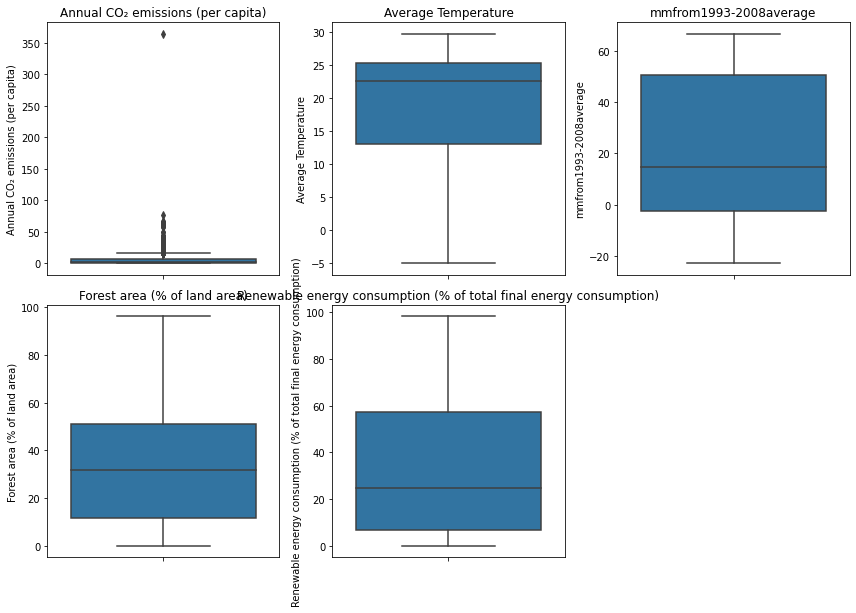

In [182]:
# Set the font to DejaVu Sans 
plt.rcParams['font.family'] = 'DejaVu Sans'  # Font style to be applied consistently to all plots

# Checking for outliers 
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Observations:
1. Annual CO₂ emissions (per capita) - Majority of data is concentrated on the low level,Few extreme outlers observed.
   The outlier shows a country with high emission per capita,the IQR is small indicating most countries have low per capita emiaaions.
2. Average temperature - No extreme outliers observed.The median is almost near the upper quartile indicating most countries have higher average temperatures.Smaller number of countries have lower average temperatures.
3. mmfrom1993-2008average - it shows sea level deviation from 1993 to 2008.The data is widely spread.Few negative values shows some areas experience below average changes.The median is closer to the lower quartile, suggesting that most observations are on the lower side.
4. Forest area (% of land area) - No extreme outliers observed.The distribution is fairly symmetrical, meaning forest area is evenly distributed across countries.
5. Renewable energy consumption(% of Total Final Energy Consumption) - No extreme outliers are visible but quite spread and many countries fall within the 40%-50% range for renewable energy use.
- The renewable energy and forest area distributions suggest that some countries rely heavily on natural resources, while others have minimal usage.


In [183]:
# Save to CSV
climate_merged_df.to_csv('Data\Climate Change - datasets\climate_merged.csv', index=False)

#### Climate Risk Index Dataset

In [184]:
# File path for climate risk dataset
file_path = r"Data\Climate Change - datasets\Climate Risk Index.csv"
# Load the dataset
index_df = pd.read_csv(file_path)

In [185]:
# Preview the first five rows
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [186]:
summarize_data(index_df)

Shape: (182, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

In [187]:
# Check the missing values
missing_summary = check_missing_values(index_df)
print(missing_summary)


                           Missing Values     Percent
the_geom                              182  100.000000
the_geom_webmercator                  182  100.000000
losses_per_gdp__total                  51   28.021978
rw_country_name                         3    1.648352
rw_country_code                         3    1.648352
fatalities_total                        0    0.000000
losses_usdm_ppp_total                   0    0.000000
losses_usdm_ppp_rank                    0    0.000000
losses_per_gdp__rank                    0    0.000000
index                                   0    0.000000
fatalities_rank                         0    0.000000
cartodb_id                              0    0.000000
fatalities_per_100k_rank                0    0.000000
cri_score                               0    0.000000
cri_rank                                0    0.000000
country                                 0    0.000000
fatalities_per_100k_total               0    0.000000


#### Data Cleaning

In [188]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


In [189]:
# Save to CSV
index_df.to_csv('Data\Climate Change - datasets\index.csv', index=False)

### 2.0 EDA

### Correlation matrix of emissions and climate indicators for 2021.

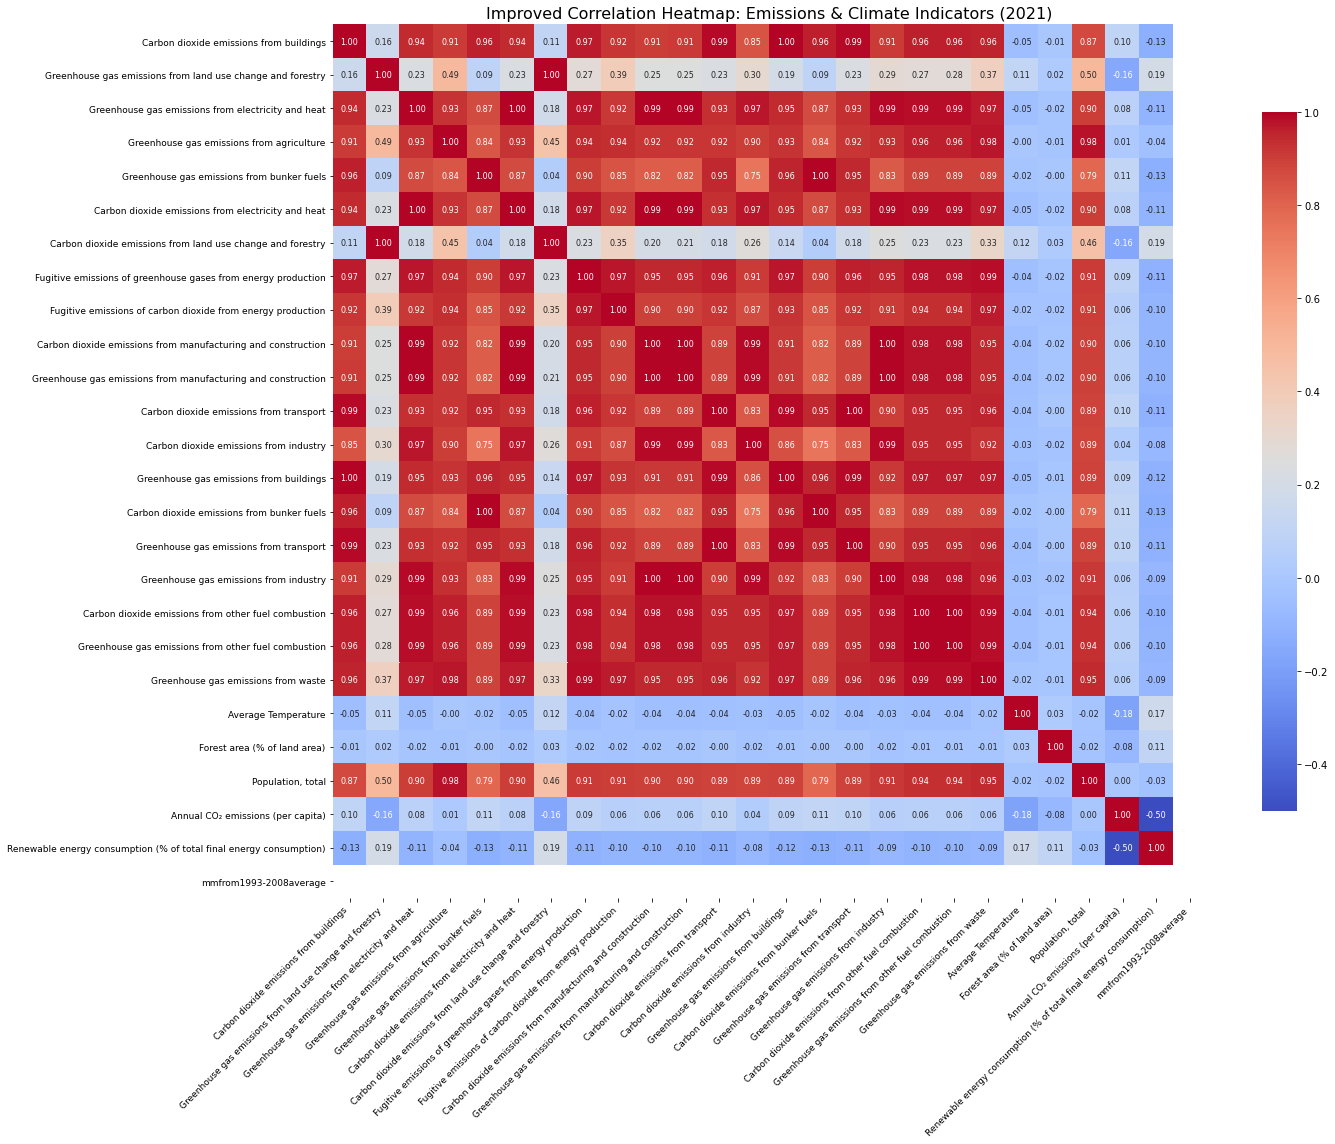

In [190]:
# Create combined dataset for heatmap (latest year only)

# Select emissions and indicators again for consistency
carbon_emissions = [col for col in climate_merged_df.columns if "Carbon dioxide emissions" in col]
ghg_emissions = [col for col in climate_merged_df.columns if "Greenhouse gas emissions" in col]
fugitive_emissions = [col for col in climate_merged_df.columns if "Fugitive emissions" in col]
climate_indicators = [
    "Average Temperature", 
    "Forest area (% of land area)", 
    "Population, total", 
    "Annual CO₂ emissions (per capita)", 
    "Renewable energy consumption (% of total final energy consumption)",
    "mmfrom1993-2008average"
]

# Combine emissions and indicators
emission_cols = list(set(carbon_emissions + ghg_emissions + fugitive_emissions))
latest_df = climate_merged_df[climate_merged_df["Year"] == climate_merged_df["Year"].max()]
heatmap_df = latest_df[emission_cols + climate_indicators].dropna()

# Compute correlation matrix
correlation = heatmap_df.corr()

# Plot with adjusted font sizes
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title("Improved Correlation Heatmap: Emissions & Climate Indicators (2021)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


Strong Positive Correlations Between Emission Sources

Almost all CO₂ and GHG emission sources (buildings, transport, electricity, agriculture, etc.) show strong inter-correlation (0.90+).

Suggests that emissions tend to rise and fall together across sectors — e.g., if industrial emissions go up, so do transport and electricity.

Climate Indicators vs Emissions
Population, total

Highly correlated (0.89–0.99) with nearly all emission sources.

Indicates that larger populations contribute more to emissions — directly or indirectly through energy, transport, and industrial activity.

Renewable Energy Consumption (%)

Shows consistent negative correlations with emissions:

-0.10 to -0.12 with key CO₂ sectors.

Implies that higher renewable energy adoption is associated with lower emissions, albeit weakly in this dataset snapshot.

Forest Area (% of land area)

Weakly negative or near-zero correlation with most emissions sources.

Possibly due to:

Lagged effects of deforestation

Forest-rich nations not being large emitters

Average Temperature

Mostly weak to negative correlations (around -0.05 to 0.14).

Possibly due to:

This being a single-year snapshot (2021)

Temperature influenced by cumulative emissions, not just current values

mmfrom1993-2008average (likely sea-level rise or climate anomaly)

Strong negative correlation with:

Renewable energy (-0.50)

Slightly negative with emissions too

Possibly highlights that regions with higher sea-level anomalies or climate stress invest more in renewable energy



### Top 10 Emission Sources Over Time

In [191]:
# Emissions and indicators DataFrames
emissions_df = climate_merged_df[["Entity", "Year"] + emission_cols]
indicators_df = climate_merged_df[["Entity", "Year"] + climate_indicators]

# Group by Year (handling missing values naturally via sum and mean)
emissions_over_time = emissions_df.groupby("Year")[emission_cols].sum(min_count=1)
indicators_over_time = indicators_df.groupby("Year")[climate_indicators].mean()


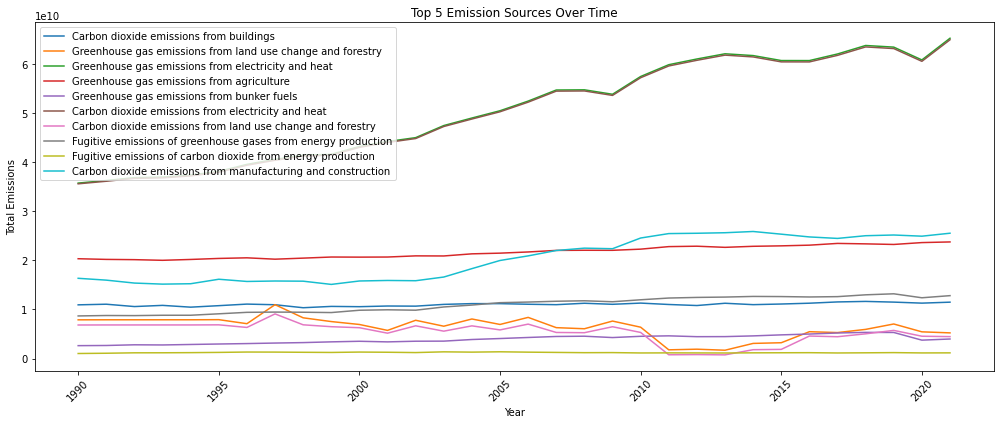

In [ ]:
# Plot emissions over time
plt.figure(figsize=(14, 6))
for col in emissions_over_time.columns[:10]:  
    plt.plot(emissions_over_time.index.to_numpy(), emissions_over_time[col].values, label=col)

plt.title("Top 10 Emission Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Emission Sources Over Time
1. Greenhouse Gas Emissions from Electricity and Heat

Dominant and rising source of emissions since 1990.

Steady increase with a notable rise between 2005–2012.

Despite some dips (~2015 and 2020), the trend continues upward — likely due to global energy demands, especially in developing economies.

Insight: Electricity and heat production are the primary contributors to global emissions, underlining the need for cleaner energy transitions.

2. Fugitive Emissions from Energy Production

Clear upward trend over time.

Rapid growth between 2000 and 2015, catching up with other major sectors.

Insight: Reflects increased extraction and burning of fossil fuels like oil, gas, and coal — especially in developing energy economies.

3. Greenhouse Gas Emissions from Industry

Slow but steady increase across the timeline.

Indicates continued industrialization, especially in Asia and Africa.

Insight: Manufacturing and construction remain key contributors and must be part of decarbonization efforts.

4. Carbon Dioxide Emissions from Other Fuel Combustion

Flat or slightly declining trend.

Suggests this sector has seen efficiency gains or fuel switching.

Insight: Policies promoting clean fuels or phasing out older technologies might be having a positive impact.

5. CO₂ Emissions from Buildings

Gradual increase, but relatively lower magnitude than others.

Some growth after 2000 may reflect urbanization and residential energy use.

Insight: As urban populations grow, emissions from buildings may become more significant if not controlled.

### Climate Indicators Over Time

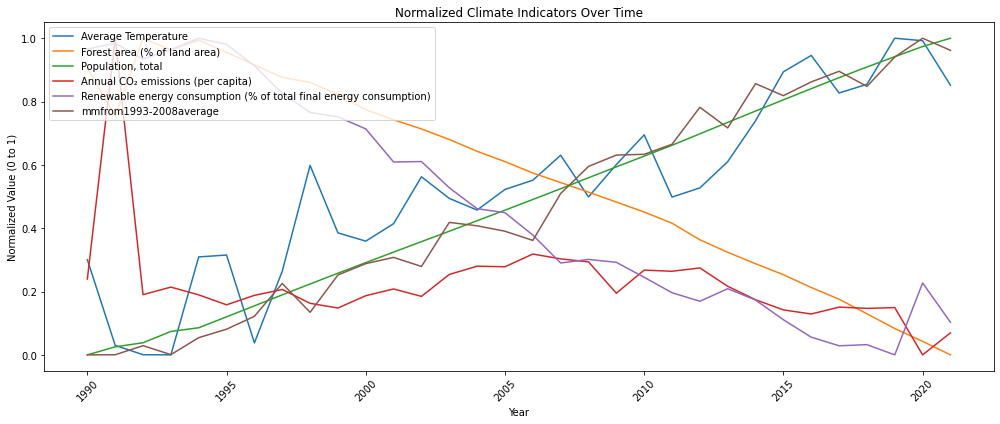

In [193]:
# Plot climate indicators over time
# Normalize climate indicators using Min-Max scaling
normalized_indicators = (indicators_over_time - indicators_over_time.min()) / (indicators_over_time.max() - indicators_over_time.min())

# Plot all normalized indicators
plt.figure(figsize=(14, 6))
for col in normalized_indicators.columns:
    plt.plot(normalized_indicators.index.to_numpy(), normalized_indicators[col].to_numpy(), label=col)

plt.title("Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. Population, Total

Steady and sharp increase from 1990 to 2022.

Reaches the maximum normalized value by the end.

Insight: Population growth continues to intensify global climate pressures, increasing demand for energy, food, and infrastructure.

2. Average Temperature

Rising trend, especially sharp after 2005.

Normalized value climbs consistently.

Insight: Temperature increase strongly aligns with emissions and population growth, reflecting climate change impacts.

3. Forest Area (% of Land)

Steady decline over time.

One of the clearest negative trends in the chart.

Insight: Ongoing deforestation reduces carbon sinks, exacerbating climate risks and biodiversity loss.

4. CO₂ Emissions per Capita

Fluctuating but mostly flat or slightly downward trend.

Some dips in recent years suggest partial decoupling of emissions from population.

Insight: This could reflect energy efficiency improvements, renewable adoption, or policy changes in major emitting nations.

5. Renewable Energy Consumption (%)

Shows a gradual rise, especially after 2010.

Still not dominant but clearly improving.

Insight: Positive development — renewable energy is gaining ground, albeit slowly. Needs to accelerate to offset fossil fuel reliance.

6. mmfrom1993-2008average 

Increasing from mid-1990s onward.

Rises in tandem with temperature.

Insight: Rising sea level or similar climate anomaly — further evidence of warming and glacial melt.

### The relationships between climate indicators and emissions.

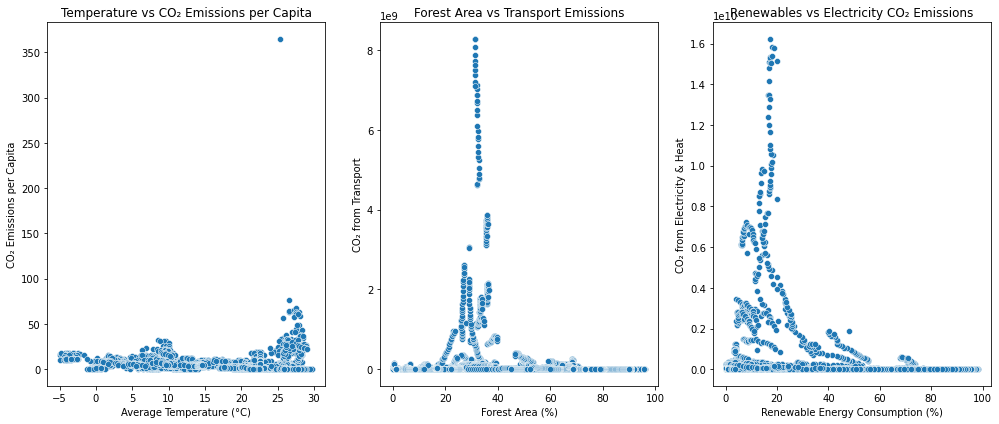

In [194]:
# Create scatter plots for selected variable pairs
plt.figure(figsize=(14, 6))

# Average Temperature vs CO2 Emissions Per Capita
plt.subplot(1, 3, 1)
sns.scatterplot(data=climate_merged_df, x="Average Temperature", y="Annual CO₂ emissions (per capita)")
plt.title("Temperature vs CO₂ Emissions per Capita")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("CO₂ Emissions per Capita")

# Scatter: Forest Area vs Transport Emissions
plt.subplot(1, 3, 2)
sns.scatterplot(data=climate_merged_df, x="Forest area (% of land area)", 
                y="Carbon dioxide emissions from transport")
plt.title("Forest Area vs Transport Emissions")
plt.xlabel("Forest Area (%)")
plt.ylabel("CO₂ from Transport")

# Renewable Energy vs Electricity Emissions
plt.subplot(1, 3, 3)
sns.scatterplot(data=climate_merged_df, 
                x="Renewable energy consumption (% of total final energy consumption)", 
                y="Carbon dioxide emissions from electricity and heat")
plt.title("Renewables vs Electricity CO₂ Emissions")
plt.xlabel("Renewable Energy Consumption (%)")
plt.ylabel("CO₂ from Electricity & Heat")

plt.tight_layout()
plt.show()

1. Temperature vs CO₂ Emissions per Capita

Observation:

Most countries cluster between 0–25°C and 0–30 emissions per capita.

A few outliers exceed 100+ emissions per capita.

No clear linear trend.

Insight:

There is no strong direct correlation between average temperature and per capita emissions.

Some colder countries (likely fossil fuel producers/consumers) have extremely high emissions.

Climate vulnerability is not tied to emissions responsibility, highlighting the equity gap.

2. Forest Area vs CO₂ from Transport

Observation:

Highest emissions cluster around 20–40% forest cover.

Countries with extremely low or high forest area tend to have lower transport emissions.

Trend appears inverted U-shaped.

Insight:

Moderate forest cover regions may include urbanizing middle-income nations where car usage is high.

High forest cover = often low-emission, forest-rich nations (Amazon, Congo Basin).

Low forest cover = possibly arid or resource-poor countries with less transport infrastructure.

3. Renewable Energy (%) vs CO₂ from Electricity and Heat

Observation:

Strong inverse relationship: Higher renewable energy share corresponds to much lower electricity emissions.

Countries with >60% renewables show near-zero CO₂ from electricity and heat.

Insight:

This is a clear success case: transitioning to renewables directly reduces emissions.

Countries investing in hydro, wind, or solar achieve major climate benefits in the energy sector.

### Top 10 CO₂ Emitters by Sector

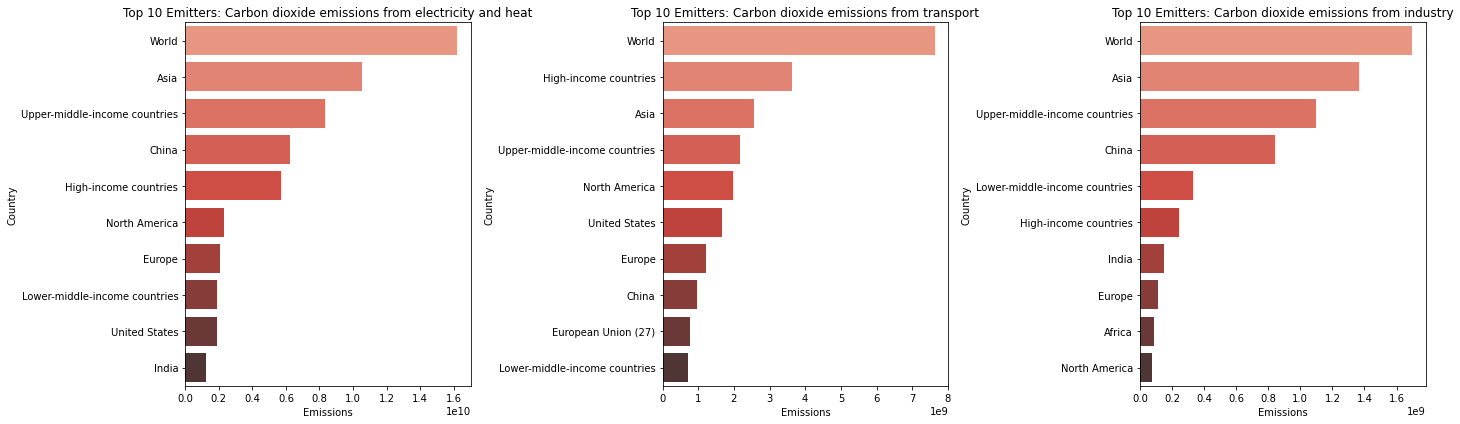

In [195]:
# Get the most recent year available
latest_year = climate_merged_df["Year"].max()

# Filter the dataset for the latest year
latest_df = climate_merged_df[climate_merged_df["Year"] == latest_year]

# Select a few top emission sources
top_sources = [
    "Carbon dioxide emissions from electricity and heat",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from industry"
]

# Sort and get top 10 countries for each emission source
top_emitters = {}
for col in top_sources:
    top_emitters[col] = latest_df[["Entity", col]].sort_values(by=col, ascending=False).head(10)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(top_sources):
    sns.barplot(data=top_emitters[col], x=col, y="Entity", ax=axes[i], palette="Reds_d")
    axes[i].set_title(f"Top 10 Emitters: {col}")
    axes[i].set_xlabel("Emissions")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()


1. Electricity & Heat Production

Global emissions surpass 1.5e10 (15 billion tons).

Asia and Upper-middle-income countries dominate.

China alone emits more than high-income countries.

India and the United States are significant contributors.

Insight:

Electricity and heat are the largest emission source globally, especially in Asia. The dominance of fossil fuels in power generation is a key target for clean energy transition.

2. Transport
Emissions are led by:

High-income countries

North America and the United States

China and European Union have a smaller share compared to electricity.

Insight:

Transport emissions are driven heavily by developed regions, where car ownership, aviation, and freight are high. Urban planning and EV adoption are key here.

3. Industry
Asia again leads, followed by upper- and lower-middle-income countries.

China contributes heavily.

India, Africa, and Europe appear with smaller shares.

Insight:

Industrial emissions are a major challenge in developing economies, particularly those experiencing rapid manufacturing growth. Clean technologies and carbon capture are essential.

### East Africa Countries

In [196]:
# Define East African countries
East_Africa= [
    "Kenya", "Uganda", "Tanzania", "Ethiopia", "Rwanda", 
    "Burundi", "South Sudan", "Somalia", "Eritrea"
]

In [197]:
# Filter data for East African countries
ea_climate = climate_merged_df[climate_merged_df["Entity"].isin(East_Africa)]
ea_risk = index_df[index_df["country"].isin(East_Africa)]

In [198]:
# Group by Year to get East African regional averages
ea_climate_avg = ea_climate.groupby("Year")[climate_indicators].mean()

### East Africa - Average Climate Indicators Over Time

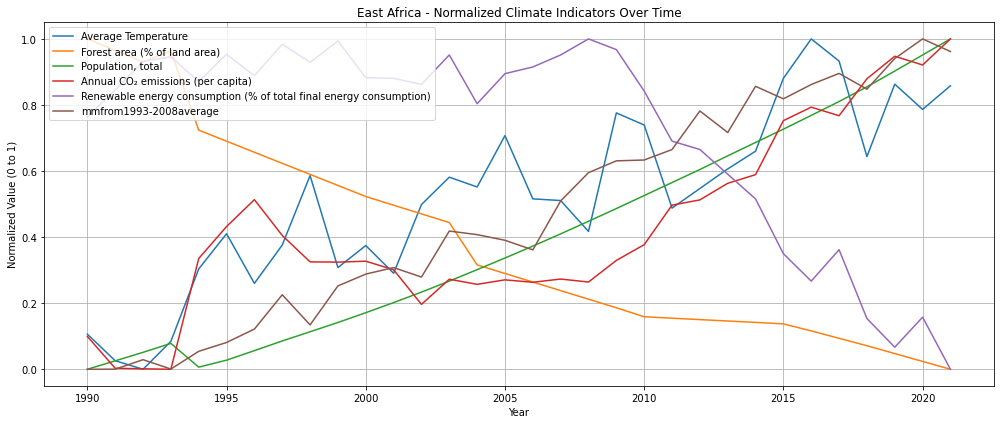

In [199]:
# Normalize the indicators for comparison
normalized_df = (ea_climate_avg - ea_climate_avg.min()) / (ea_climate_avg.max() - ea_climate_avg.min())
 
plt.figure(figsize=(14, 6))
for col in normalized_df.columns:
    plt.plot(normalized_df.index.to_numpy(), normalized_df[col].to_numpy(), label=col)

plt.title("East Africa - Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


1. Population (Green Line)

Consistent upward trend from 1990 to 2022.


 2. Average Temperature (Blue Line)

Rising with fluctuation, especially post-2000.

Peaks in recent years reflect warming climate patterns in the region.

 3. Forest Area (% of land area) (Orange Line)

Steady decline — one of the most consistent downward trends.

Indicates deforestation likely due to agriculture, fuelwood, and urban expansion.

 4. CO₂ Emissions per Capita (Red Line)

Low overall, but shows a gradual increase over time.

Indicates slow industrialization and fossil fuel use growth.

 5. Renewable Energy Consumption (%) (Purple Line)

Initially high, then declining since ~2005.

Suggests growing demand is being met by non-renewables, or changes in biomass reporting.

 6. mmfrom1993-2008average (Brown Line)
 
Generally rising — may represent sea level anomalies or regional climate variability.

Confirms growing climate stress signals in East Africa.



### Top CO₂ Emitters by Sector in East Africa

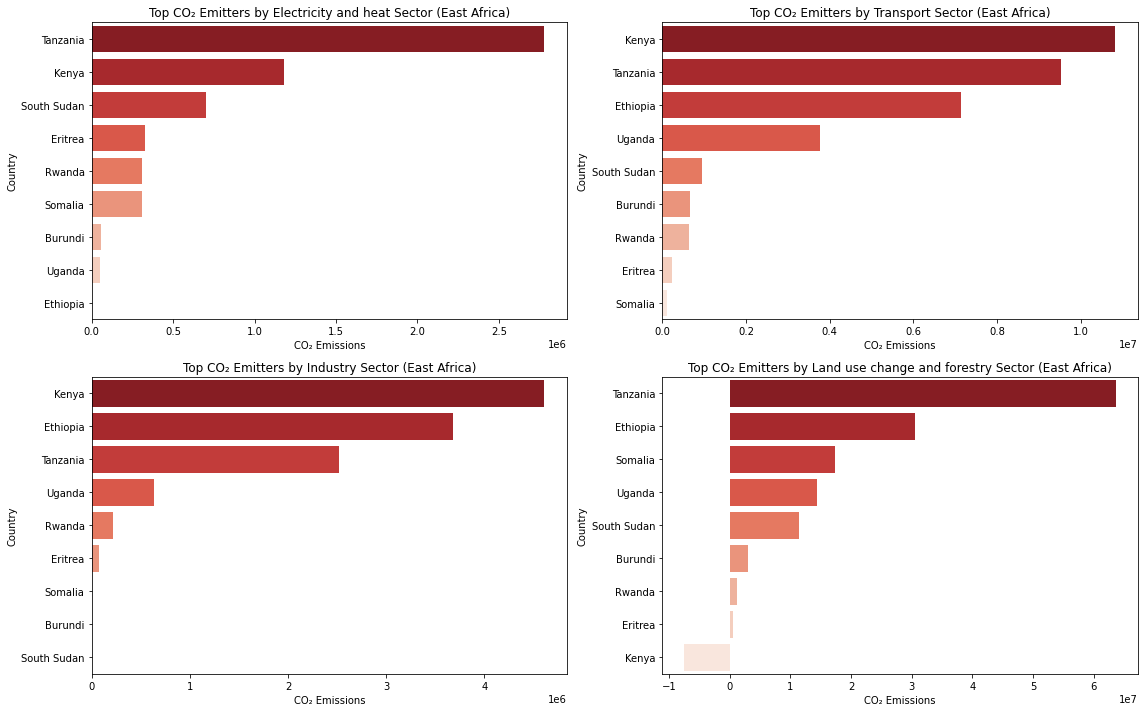

In [200]:
# Filter for the most recent year
latest_ea_df = climate_merged_df[(climate_merged_df["Entity"].isin(East_Africa)) & (climate_merged_df["Year"] == latest_year)]

# Define relevant CO₂ emission sectors
emission_sectors = [
    "Carbon dioxide emissions from electricity and heat",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from industry",
    'Carbon dioxide emissions from land use change and forestry'
]

# Prepare top emitters data for each sector
top_emitters_by_sector = {}
for sector in emission_sectors:
    top_emitters_by_sector[sector] = latest_ea_df[["Entity", sector]].sort_values(by=sector, ascending=False)

# Plot each sector separately

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, sector in enumerate(emission_sectors):
    sns.barplot(
        data=top_emitters_by_sector[sector],
        x=sector,
        y="Entity",
        ax=axes[i],
        palette="Reds_r"
    )
    axes[i].set_title(f"Top CO₂ Emitters by {sector.split(' from ')[-1].capitalize()} Sector (East Africa)")
    axes[i].set_xlabel("CO₂ Emissions")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()


- Electricity & Heat Sector

Tanzania leads significantly

Followed by Kenya and South Sudan

Ethiopia and Uganda have very low emissions here

- Transport Sector

Kenya is the largest emitter in transport

Closely followed by Tanzania and Ethiopia

Reflects higher vehicle ownership and transport activity

- Industry Sector

Kenya again leads, followed by Ethiopia and Tanzania

Indicates more developed or active manufacturing bases

- land use change and forestry

Kenya shows negative emissions  due to Afforestation,conservation efforts or natural forest regrowth.

Tanzania and Ethiopia are highest emittors due to high deforestation for agriculture.


#### NB : Kenya shows consistent top-tier emissions in 3 of 4 sectors, suggesting it's currently the most energy- and emissions-intensive country in East Africa.

### Trend of CO₂ Emissions by Sector in Kenya (1990–2022)

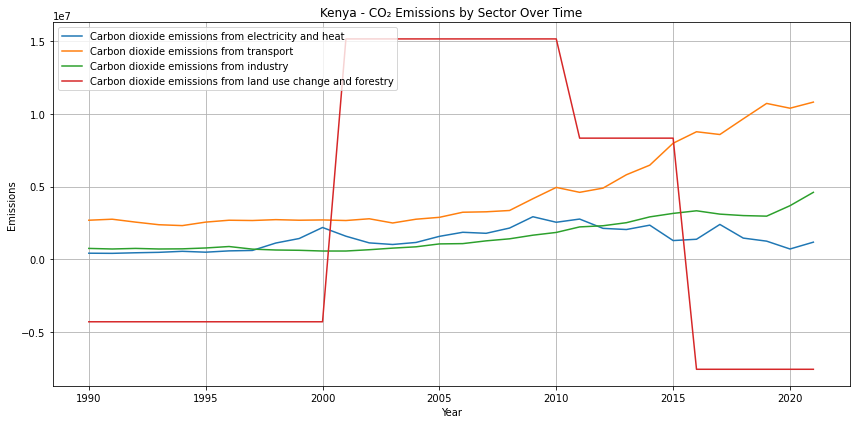

In [201]:
# Filter for Kenya only
kenya_df = climate_merged_df[climate_merged_df["Entity"] == "Kenya"]


# Select year and emissions (without dropping missing values)
kenya_emissions = kenya_df[["Year"] + emission_sectors]

# Plot each sector over time
plt.figure(figsize=(12, 6))
for col in emission_sectors:
    plt.plot(kenya_emissions["Year"].values, kenya_emissions[col].values, label=col)

plt.title("Kenya - CO₂ Emissions by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

Sectoral Emission Trends:

- Land Use Change and Forestry (Red line)
This sector shows sharp fluctuations, with sudden spikes and drops.

The dramatic rise and fall suggests data inconsistencies or policy-driven changes.

- Transport (Orange Line)

Largest and fastest-growing source of emissions

Rapid growth especially post-2010, likely due to:

Increased vehicle ownership

Urbanization and road transport expansion

- Industry (green Line) 

Moderate but steady rise since early 2000s

Reflects growing manufacturing and industrial activity

- Electricity and Heat (Blue)

Emissions from electricity and heat are gradually increasing over time.

There is a small dip, possibly due to increased renewable energy adoption or policy changes

#### Kenya - Climate Indicators Over Time

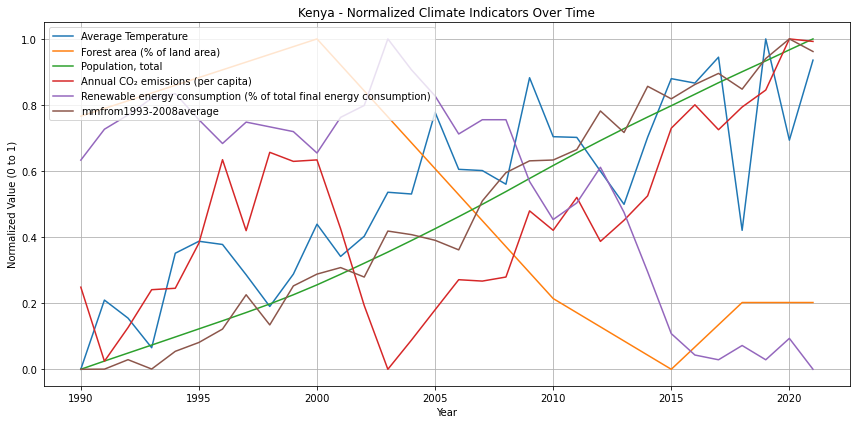

In [202]:
# Filter relevant columns for Kenya
kenya_climate_indicators = kenya_df[["Year"] + climate_indicators]
# Normalize climate indicators for Kenya (Min-Max scaling)
normalized_kenya = (kenya_climate_indicators.set_index("Year") - kenya_climate_indicators.set_index("Year").min()) / \
                   (kenya_climate_indicators.set_index("Year").max() - kenya_climate_indicators.set_index("Year").min())

# Plot normalized indicators

plt.figure(figsize=(12, 6))
for col in normalized_kenya.columns:
    plt.plot(normalized_kenya.index.to_numpy(), normalized_kenya[col].to_numpy(), label=col)

plt.title("Kenya - Normalized Climate Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0 to 1)")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


- Population (Green Line)

Smooth, steady rise — from 0 to 1 (min to max population in dataset).

Reflects Kenya’s strong demographic growth, which increases pressure on:

Resources (land, water, food)

Infrastructure (housing, transport)

Climate and energy demand

 Insight: Population growth is a primary driver of demand-side climate stress.

- Average Temperature (Blue Line)

Rising with fluctuations — climbs from ~0.3 to nearly 1.

Spikes indicate years of heat extremes.

Insight: Kenya is experiencing warming temperatures in line with global climate change. This threatens agriculture, water access, and health.

- Forest Area (% of Land Area) (Orange Line)

Consistent decline from 1 to near 0.

Suggests extensive deforestation due to:

Agriculture expansion

Charcoal/fuelwood use

Urban growth

 Insight: Kenya is rapidly losing forest cover, weakening natural climate buffers.

- CO₂ Emissions per Capita (Red Line)

Fluctuating, but overall rising trend

Jumps post-2010 possibly due to:

Urbanization

Industrial growth

Motorization

 Insight: While still low globally, emissions per capita are increasing, showing a shift toward fossil fuel use.

- Renewable Energy Consumption (%) (Purple Line)

Starts high, then gradually declines post-2005.

Could indicate:

Increasing use of grid electricity (some fossil fuel share)

Drop in biomass use

Modernization of energy mix

 Insight: Kenya’s renewable share is still strong, but vigilance is needed to prevent decline in clean energy reliance.

 - mmfrom1993-2008average (Brown Line) (assumed climate anomaly)

Moderate increase; aligns with temperature and CO₂ rise.

Insight: Kenya may be facing climate stress signals such as sea level rise or rainfall anomalies.

### Correlation : Climate Risk , Health and Economic Impact

In [203]:
# Select relevant columns
impact_cols = [
    "country", "cri_rank", "cri_score", 
    "fatalities_total", "fatalities_per_100k_total", 
    "losses_usdm_ppp_total", "losses_per_gdp__total"
]

#### Insights from the Heatmap

##### Strong Positive Correlations

- cri_rank ↔ cri_score (0.99)

→ These are nearly identical — likely two ways of expressing the same risk index.

- fatalities_per_100k_total ↔ losses_per_gdp__total (0.83)

→ Countries with higher population-adjusted deaths also face larger GDP damage, suggesting vulnerability to climate events, especially in lower-income countries.

- fatalities_total ↔ losses_usdm_ppp_total (0.60)

→ High-fatality countries also tend to report higher absolute economic losses.

### Top 10 Countries by Total Fatalities from Climate Events

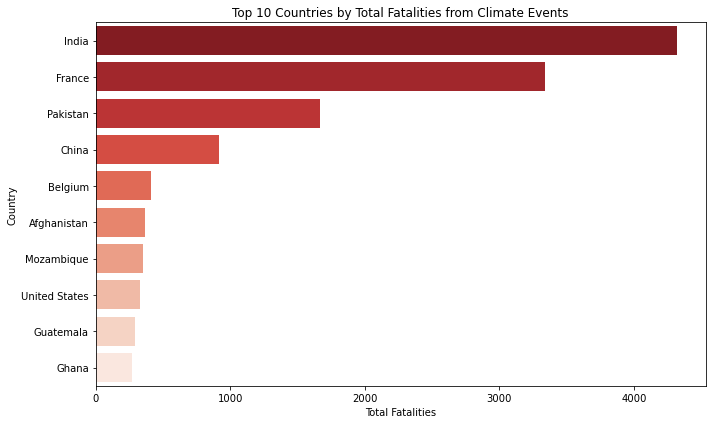

In [204]:
# Top 10 countries by fatalities
top_fatalities = index_df[impact_cols].sort_values(by="fatalities_total", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_fatalities, x="fatalities_total", y="country", palette="Reds_r")
plt.title("Top 10 Countries by Total Fatalities from Climate Events")
plt.xlabel("Total Fatalities")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

This bar chart highlights the countries that have suffered the highest total number of deaths due to climate-related disasters.

Key Observations

- India leads with the highest number of fatalities (>4,300)

Reflects high exposure to floods, heatwaves, and storms.

Large population and varied geography increase vulnerability.

- France ranks second (~3,300 deaths)

Likely driven by deadly heatwaves, especially the 2003 European heatwave.

Surprising for a high-income nation, showing climate risk is not limited to the Global South.


### Top 10 Countries by Economic Loss (USD PPP)

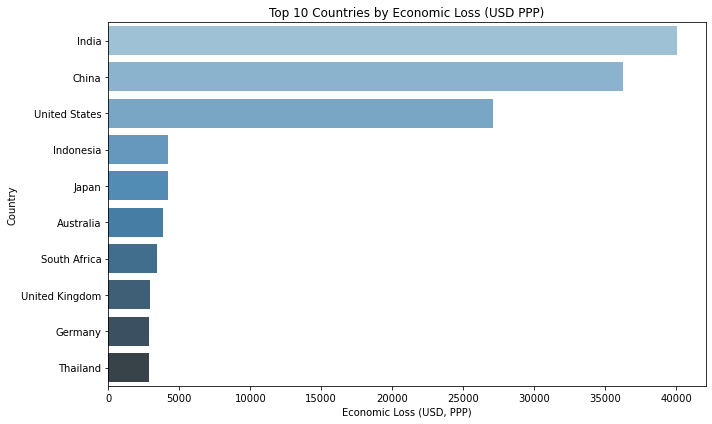

In [205]:
# Top 10 countries by economic loss
top_losses = index_df[impact_cols].sort_values(by="losses_usdm_ppp_total", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_losses, x="losses_usdm_ppp_total", y="country", palette="Blues_d")
plt.title("Top 10 Countries by Economic Loss (USD PPP)")
plt.xlabel("Economic Loss (USD, PPP)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Key Observations

- India tops the chart with ~$40,000M (PPP) in economic loss

Massive vulnerability to cyclones, monsoons, droughts, and infrastructure damage

High population and agricultural dependence increase exposure

- China follows closely

Regularly hit by floods, typhoons, and heatwaves

High infrastructure and industrial base means damage is costly

- United States is 3rd despite wealth and preparedness

Losses driven by hurricanes, wildfires, floods, and winter storms

Climate extremes becoming more intense and frequent

### Top 10 Countries by Climate Risk Index Score

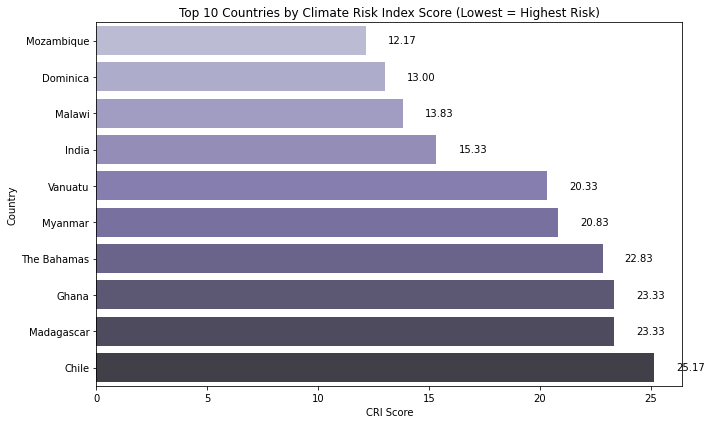

In [206]:
# Sort by CRI score in ascending order (assuming lower = higher risk)
top_cri = index_df.sort_values(by="cri_score", ascending=True).head(10)

# Plot with values labeled
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_cri, x="cri_score", y="country", palette="Purples_d")
plt.title("Top 10 Countries by Climate Risk Index Score (Lowest = Highest Risk)")
plt.xlabel("CRI Score")
plt.ylabel("Country")

# Annotate each bar with its score
for i, v in enumerate(top_cri["cri_score"]):
    ax.text(v + 1, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()

Key Observations

- Mozambique (CRI Score: 12.17)

Ranks as the most climate-vulnerable country in this dataset

Highly exposed to cyclones, flooding, and droughts

- Dominica, Malawi, India follow closely

Dominica: Devastated by hurricanes like Maria

Malawi: Recurring floods, extreme weather

India: High exposure due to geography and large population

- Island and coastal nations dominate the list

Vanuatu, Bahamas, Dominica, Madagascar

Small island nations are hit hardest by rising sea levels, storms, and limited adaptive capacity

#### Correlation

In [207]:
# Relevant columns for correlation analysis
correlation_data = index_df[['cri_score', 'losses_per_gdp__total', 'fatalities_total', 'fatalities_per_100k_total','losses_usdm_ppp_total',]]

# compute correlation
correlation_matrix = correlation_data.corr()

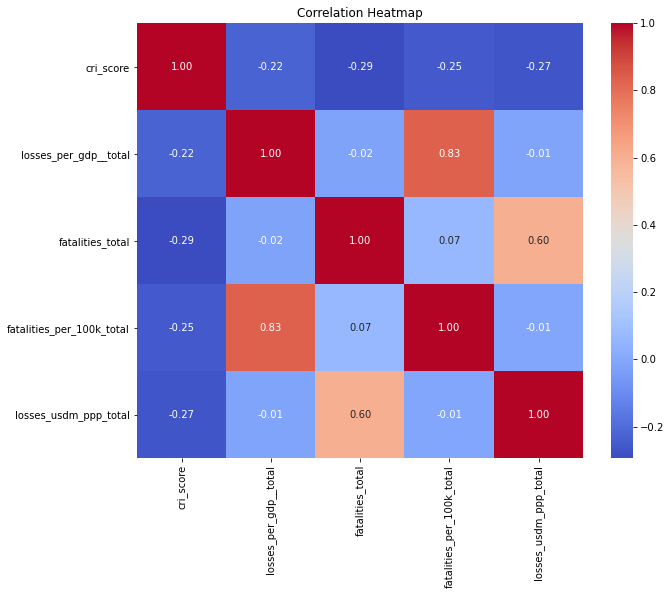

In [208]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Observations:

Strong Positive Correlations:

- losses_per_gdp_total and fatalities_per_100k_total (0.83) → Higher economic losses per GDP are associated with higher fatalities per 100,000 people.

- fatalities_total and losses_usdm_ppp_total (0.60) → More fatalities are linked to higher losses in terms of purchasing power parity.

Negative Correlations with cri_score:

- fatalities_total (-0.29) and cri_score → As total fatalities increase, the Climate Risk Index (CRI) score tends to decrease.

- losses_per_gdp_total (-0.22) and cri_score → Higher economic losses are weakly linked to lower CRI scores.

Explanation: 
- cri_score is weakly correlated with economic losses (losses_per_gdp_total), total fatalities, and other variables in the dataset, this suggests that the CRI score incorporates additional factors beyond just direct financial and human losses.These factors might include:
  - Adaptive capacity & resilience -  Countries with better disaster preparedness (e.g, early warning systems, infrastructure, emergency response) may have lower CRI scores despite high losses.
  - Frequency & intensity of events -  A country may frequently experience smaller-scale disasters with minimal fatalities, which impacts its CRI score differently than a single, highly destructive event.



## 3.0 Modelling